# Composites simulation :  Experimental validation

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simmit import smartplus as sim
from simmit import identify as iden
import os
import itertools

dir = os.path.dirname(os.path.realpath('__file__'))

We need to import here the data, modify them if needed and proceed

In [2]:
nstatev = 0

nphases = 2 #The number of phases
num_file = 0 #The num of the file that contains the subphases
int1 = 50
int2 = 50
n_matrix = 0

props = np.array([nphases, num_file, int1, int2, n_matrix])

NPhases_file = dir + '/keys/Nellipsoids0.dat'
NPhases = pd.read_csv(NPhases_file, delimiter=r'\s+', index_col=False, engine='python')
NPhases[::]


,Number,Coatingof,umat,save,c,psi_mat,theta_mat,phi_mat,a1,a2,a3,psi_geom,theta_geom,phi_geom,nprops,nstatev,props
0,0,0,ELISO,1,@0p,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,3,1,2250
1,1,0,ELISO,1,@1p,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,3,1,73000


In [5]:
path_data = dir + '/data'
path_keys = dir + '/keys'
pathfile = 'path.txt'

nparams = 4
param_list = iden.read_parameters(nparams)

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

concentration = np.arange(0.,0.51,0.01)

E_MT = np.zeros(len(concentration))
umat_name = 'MIMTN'
for i, x in enumerate (concentration):
 
    param_list[1].value = x
    param_list[0].value = 1.-x
    
    iden.copy_parameters(param_list, path_keys, path_data)
    iden.apply_parameters(param_list, path_data)

    L = sim.L_eff(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, path_data)
    p = sim.L_iso_props(L)
    E_MT[i] = p[0]

    
E_SC = np.zeros(len(concentration))
umat_name = 'MISCN'
for i, x in enumerate (concentration):
 
    param_list[1].value = x
    param_list[0].value = 1.-x
    
    iden.copy_parameters(param_list, path_keys, path_data)
    iden.apply_parameters(param_list, path_data)

    L = sim.L_eff(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, path_data)
    p = sim.L_iso_props(L)
    E_SC[i] = p[0]


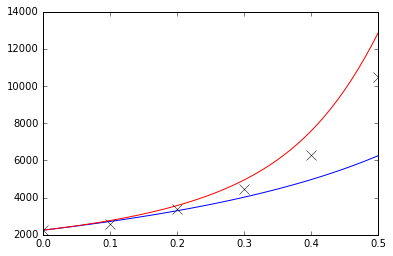

In [4]:
fig = plt.figure()
plt.plot(concentration,E_MT, c='blue')
plt.plot(concentration,E_SC, c='red')
expfile = path_data + '/' + 'E_exp.txt'
c,E = np.loadtxt(expfile, usecols=(0,1), unpack=True)
plt.plot(c,E,linestyle='None', marker='x', color='black', markersize=10)
plt.show()